<a href="https://colab.research.google.com/github/Ganesh00000/project_7th_sem/blob/main/project7th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import cv2
import pathlib

In [4]:
from google.colab import drive

In [5]:
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
url="/content/drive/MyDrive/PlantVillage"

In [7]:
url=pathlib.Path(url)

In [8]:
data={"Pepper__bell___Bacterial_spot":list(url.glob("Pepper__bell___Bacterial_spot/*"))[:400],
      "Pepper__bell___healthy":list(url.glob("Pepper__bell___healthy/*"))[:400],
      "Potato___Early_blight":list(url.glob("Potato___Early_blight/*"))[:400],
      "Tomato_Late_blight":list(url.glob("Tomato_Late_blight/*"))[:400],
      "Tomato_healthy":list(url.glob("Tomato_healthy/*"))[:400],
      "Potato___Late_blight":list(url.glob("Potato___Late_blight/*"))[:400],
      "Potato___healthy":list(url.glob("Potato___healthy/*"))[:400],
      "Tomato_Early_blight":list(url.glob("Tomato_Early_blight/*"))[:400]
      }

In [9]:
data_items={"Pepper__bell___Bacterial_spot":1,
      "Pepper__bell___healthy":0,
      "Potato___Early_blight":3,
      "Tomato_Late_blight":7,
      "Tomato_healthy":5,
      "Potato___Late_blight":4,
      "Potato___healthy":2,
      "Tomato_Early_blight":6}

In [10]:
len(data["Tomato_healthy"])

400

In [11]:
import PIL

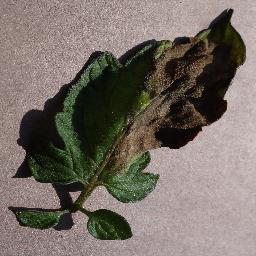

In [12]:
PIL.Image.open(data["Tomato_Late_blight"][1])

In [13]:
for i in data:
  print(len(data[i]))

400
400
400
400
400
400
152
400


In [14]:
x=[]
y=[]

In [15]:
for i,j in data.items():
  for k in j:
    img=cv2.imread(str(k))
    img_res=cv2.resize(img,(224,224))
    x.append(img_res)
    y.append(data_items[i])

In [16]:
x=np.array(x)
y=np.array(y)

In [17]:
x.shape

(2952, 224, 224, 3)

In [18]:
y.shape

(2952,)

In [19]:
x=x/255

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [22]:
import tensorflow_hub as hub

In [23]:
model=keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/cropnet/feature_vector/cassava_disease_V1/1',trainable=False,input_shape=(224,224,3)),
    keras.layers.Dense(8,activation="softmax")]
)

In [24]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [25]:
model.fit(x_train,y_train,epochs=10,batch_size=8)

Epoch 1/10
259/259 [==============================] - 23s 28ms/step - loss: 0.7891 - accuracy: 0.7556
Epoch 2/10
259/259 [==============================] - 7s 27ms/step - loss: 0.3348 - accuracy: 0.8935
Epoch 3/10
259/259 [==============================] - 7s 26ms/step - loss: 0.2515 - accuracy: 0.9230
Epoch 4/10
259/259 [==============================] - 7s 26ms/step - loss: 0.1960 - accuracy: 0.9419
Epoch 5/10
259/259 [==============================] - 7s 26ms/step - loss: 0.1733 - accuracy: 0.9448
Epoch 6/10
259/259 [==============================] - 7s 26ms/step - loss: 0.1410 - accuracy: 0.9618
Epoch 7/10
259/259 [==============================] - 7s 26ms/step - loss: 0.1209 - accuracy: 0.9666
Epoch 8/10
259/259 [==============================] - 7s 26ms/step - loss: 0.1065 - accuracy: 0.9719
Epoch 9/10
259/259 [==============================] - 7s 26ms/step - loss: 0.0945 - accuracy: 0.9748
Epoch 10/10
259/259 [==============================] - 7s 27ms/step - loss: 0.0878 - accur

In [26]:
predict_=model.predict(x_test)

In [27]:
predict=[]

In [28]:
for i in predict_:
  predict.append(np.argmax(i))

In [29]:
model.evaluate(x_test,y_test)

28/28 [==============================] - 3s 77ms/step - loss: 0.2093 - accuracy: 0.9334


[0.20932258665561676, 0.9334085583686829]

In [30]:
from sklearn import metrics

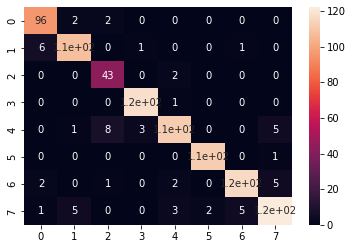

In [33]:
sb.heatmap(metrics.confusion_matrix(y_test,predict),annot=True)

In [38]:
model.save("project_7th_sem")

INFO:tensorflow:Assets written to: project_7th_sem/assets


INFO:tensorflow:Assets written to: project_7th_sem/assets


In [39]:
from google.colab import files

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4234118   
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
Total params: 4,244,366
Trainable params: 10,248
Non-trainable params: 4,234,118
_________________________________________________________________


In [45]:
model_=keras.models.load_model("/content/project_7th_sem")

In [47]:
model_.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4234118   
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
Total params: 4,244,366
Trainable params: 10,248
Non-trainable params: 4,234,118
_________________________________________________________________


In [48]:
files.download("/content/project_7th_sem/variables/variables.data-00000-of-00001")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>